**Homework 1**

**Gonçalo Meneses, 103401 e Tomás Arêde, 103239**

Começamos por carregar o nosso ficheiro arff e criar o data frame que irá armazenar os nossos dados.

In [131]:
from scipy.io import arff
import pandas as pd

data, col_names = arff.loadarff('column_diagnosis.arff')

df = pd.DataFrame(data)

df['class'] = df['class'].str.decode('utf-8')

df.columns = col_names.names()
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


**Exercício 1**

In [132]:
from sklearn.feature_selection import f_classif
import numpy as np

X = df.drop('class',axis=1)
y = df['class']

fimportance = f_classif(X, y)

# Obtain the indices for the minimum and maximum F-scores
ind1 = np.where(fimportance[0]==min(fimportance[0]))[0][0]
ind2 = np.where(fimportance[0]==max(fimportance[0]))[0][0]

min_feature = X.columns.values[ind1]
max_feature = X.columns.values[ind2]

print('Feature with minimum discriminative power:', min_feature)
print('Feature with maximum discriminative power:', max_feature)

Feature with minimum discriminative power: pelvic_radius
Feature with maximum discriminative power: degree_spondylolisthesis


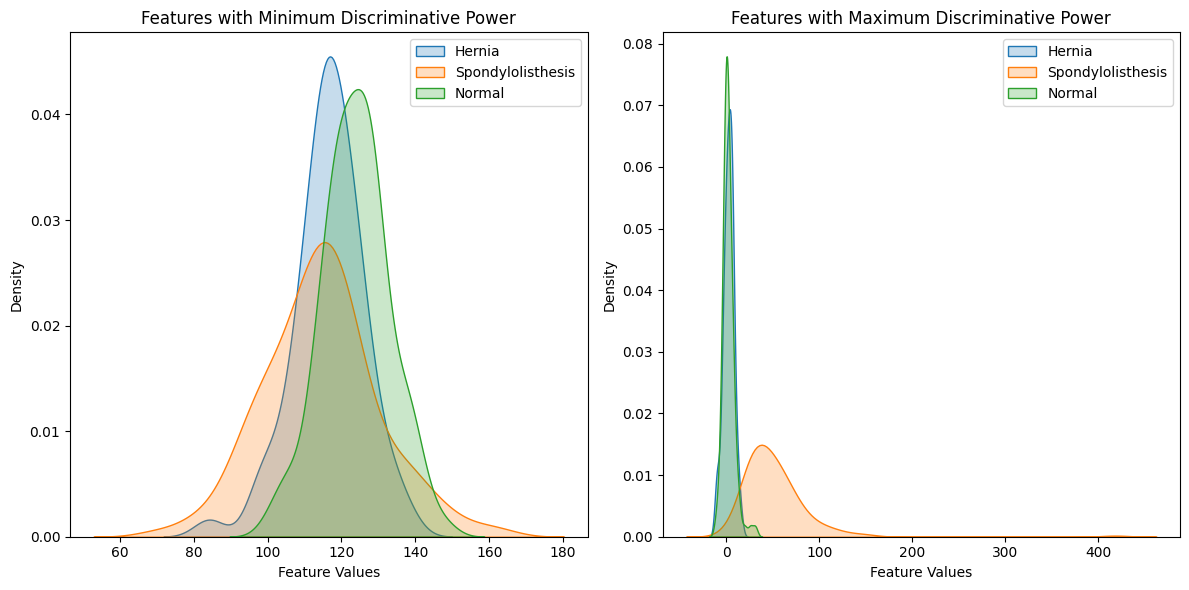

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

hernia_min = df[df['class'] == 'Hernia'][min_feature]
spondylolisthesis_min = df[df['class'] == 'Spondylolisthesis'][min_feature]
normal_min = df[df['class'] == 'Normal'][min_feature]

hernia_max = df[df['class'] == 'Hernia'][max_feature]
spondylolisthesis_max = df[df['class'] == 'Spondylolisthesis'][max_feature]
normal_max = df[df['class'] == 'Normal'][max_feature]

fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.kdeplot(hernia_min, label='Hernia', fill=True, ax=axes[0])
sns.kdeplot(spondylolisthesis_min, label='Spondylolisthesis', fill=True, ax=axes[0])
sns.kdeplot(normal_min, label='Normal', fill=True, ax=axes[0])

axes[0].set_xlabel('Feature Values')
axes[0].set_ylabel('Density')
axes[0].set_title('Features with Minimum Discriminative Power')
axes[0].legend()

sns.kdeplot(hernia_max, label='Hernia', fill=True, ax=axes[1])
sns.kdeplot(spondylolisthesis_max, label='Spondylolisthesis', fill=True, ax=axes[1])
sns.kdeplot(normal_max, label='Normal', fill=True, ax=axes[1])

axes[1].set_xlabel('Feature Values')
axes[1].set_ylabel('Density')
axes[1].set_title('Features with Maximum Discriminative Power')
axes[1].legend()

plt.tight_layout()

plt.show()

**Exercício 2**

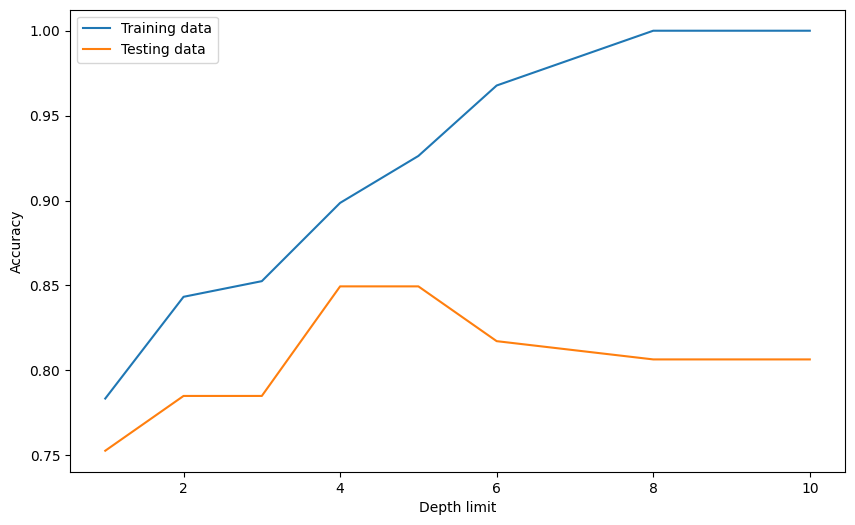

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0, stratify=y)

depth_lim = [1,2,3,4,5,6,8,10]

train_list = []
test_list = []

for depth in depth_lim:
    tree = DecisionTreeClassifier(max_depth=depth,random_state=0)
    tree.fit(X_train,y_train)
    
    train_acc = tree.score(X_train, y_train)
    test_acc = tree.score(X_test, y_test)
    
    train_list.append(train_acc)
    test_list.append(test_acc)

plt.figure(figsize=(10,6))
plt.plot(depth_lim, train_list, label='Training data')
plt.plot(depth_lim, test_list, label='Testing data')
plt.xlabel('Depth limit')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Exercício 3**

No gráfico acima, podemos ver que foram detetados valores de precisão baixos para limites de profundidade menores ou iguais a 3. Isto indica que o nosso modelo produzirá uma subadaptação para esta gama de valores. Além disso, a precisão dos nossos dados de teste reduz para profundidades maiores que 5. No entanto, a precisão dos nossos dados de treino continua a aumentar para esta gama de valores, o que é um sinal de sobre-ajuste. Assim, o modelo não terá uma boa capacidade de generalização entre configurações. Como tal, os limites de profundidade óptimos serão 4 e 5.

**Exercício 4 (i)**

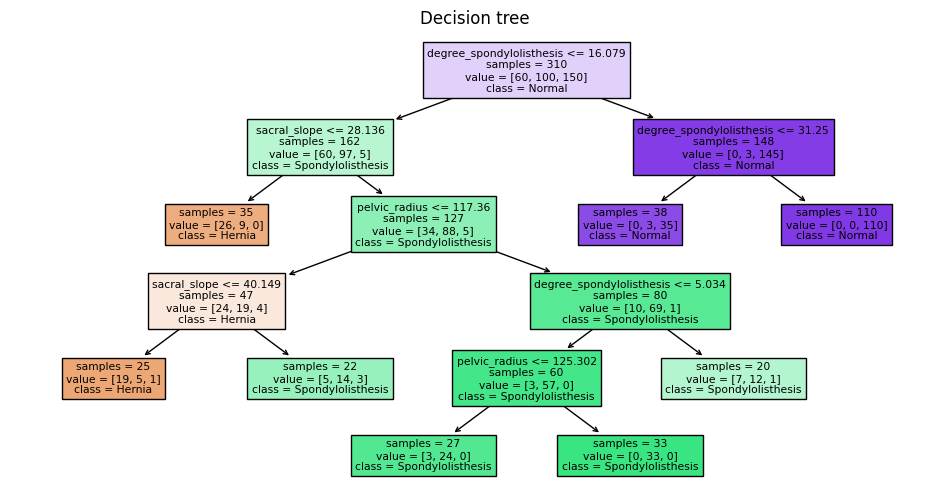

In [135]:
from sklearn.tree import plot_tree

class_names = df['class'].unique()

clf = DecisionTreeClassifier(min_samples_leaf=20,random_state=0)

clf.fit(X,y)

plt.figure(figsize=(12,6))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=class_names, impurity=False)
plt.title("Decision tree")
plt.show()

A árvore de decisão que obtivemos acima tem uma profundidade de 6. Como o único critério pedido foi o mínimo de amostras por folha ser 20, não nos preocupámos em calcular a profundidade ideal.

**Exercício 4 (ii)**

De forma a caracterizar a classe Hernia, para variáveis degree_spondylolisthesis <= 16.079 e sacral_slope <= 28.136, obtemo-la com probabilidade aproximada de 74.29% e 35 amostras. Para além disso, se novamente degree_spondylolisthesis <= 16.079, mas sacral_slope > 28.136, pelvic_radius <= 117.36 e sacral_sclope <= 40.149 teremo-la, de novo, com probabilidade de 76% e 25 amostras.